In [ ]:
%pip install scipy --upgrade
%pip install statsmodels --upgrade
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt
import statsmodels as sm
from statsmodels.stats import moment_helpers as smh
import numpy as np
import pandas as pd

# **Fishery Risk Analysis: Part I**

In [ ]:
np.random.seed(5566)

#Rockport fishing risk analysis
fishQ=3500

muPR=3.65
sigmaPR=0.2

OperC=10000

S=10000

simPR=np.random.normal(muPR,sigmaPR,S)

Demand=np.array(range(0,6001,1000))
print(Demand)
DemandProb=np.array([0.02,0.03,0.05,0.08,0.33,0.29,0.2])

simD=np.random.choice(Demand,S,replace=True,p=DemandProb)

F=np.empty(S)
for s in range(S):
  F[s]=simPR[s]*min(fishQ,simD[s])-OperC

[   0 1000 2000 3000 4000 5000 6000]


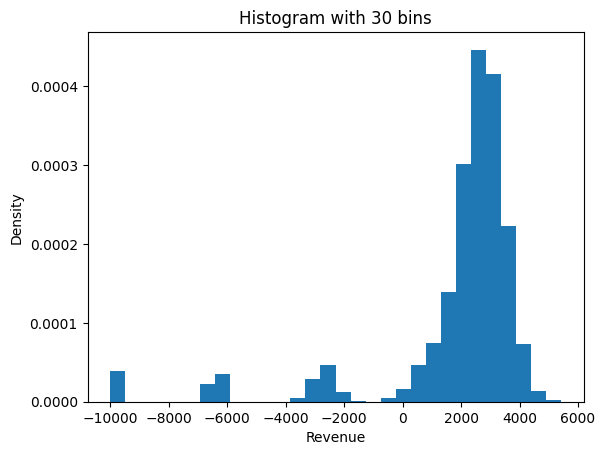

In [ ]:
#Plot the distribution of earning
plt.hist(F, density=True, bins=30)
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.title("Histogram with 30 bins")
plt.show()

In [ ]:
id=np.where(F>1375)
len(F[id])/S

0.8225

In [ ]:
id=np.where(F<0)
len(F[id])/S

0.1024

In [ ]:
print(np.quantile(F,0.025),np.quantile(F,0.975))

-6543.582841217734 4072.182479799987


In [ ]:
#Compute CVAR q=10%
q=0.10
tailF=np.quantile(F,q)
id=np.where(F<=tailF)
np.mean(F[id])

-5188.158326470183

## **Fishery Risk Analysis: Part II**

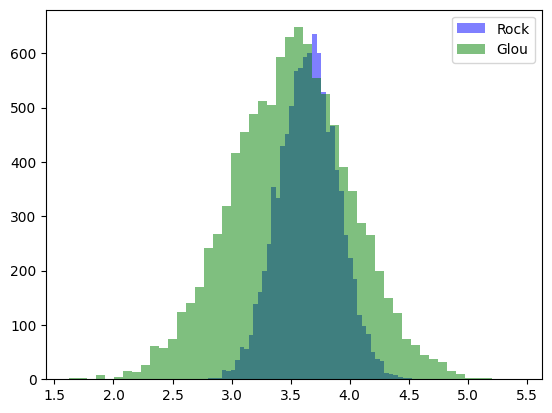

In [ ]:
#Consider Rockport as well as Gloucester
S=10000
PRRock=np.random.normal(3.65,0.25,S)
PRGlou=np.random.normal(3.5,0.5,S)

plt.hist(PRRock,bins=50,alpha=0.5,label='Rock',color='blue')
plt.hist(PRGlou,bins=50,alpha=0.5,label='Glou',color='green')
plt.legend(loc='upper right')
plt.show()

In [ ]:
simDRock=np.random.choice(Demand,S,replace=True,p=DemandProb)

simDGlou=np.random.triangular(2000,5000,6000,S)

fullload=3500
frac=np.random.uniform(0.7,1,S)
print(frac[0:5])
fishQ=np.round(fullload*frac)

[0.77692393 0.95828323 0.72165403 0.78148067 0.9371156 ]


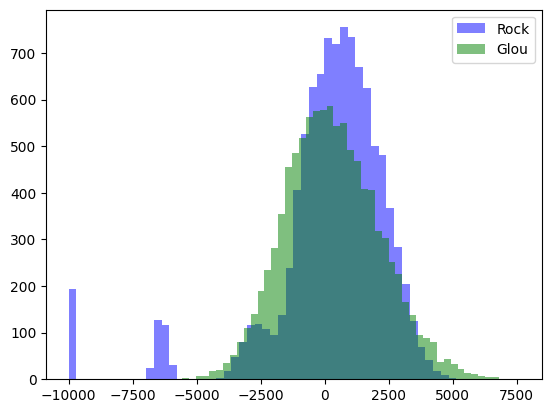

In [ ]:
F=np.zeros(S)
G=np.zeros(S)
for s in range(S):
  F[s]=PRRock[s]*min(fishQ[s],simDRock[s])-OperC
  G[s]=PRGlou[s]*min(fishQ[s],simDGlou[s])-OperC


plt.hist(F,bins=50,alpha=0.5,label='Rock',color='blue')
plt.hist(G,bins=50,alpha=0.5,label='Glou',color='green')
plt.legend(loc='upper right')
plt.show()

In [ ]:
id=np.where(F<0)
print(len(F[id])/S)
id=np.where(G<0)
print(len(G[id])/S)

0.3682
0.4552


In [ ]:
##Stochastic dominance analysis
##See https://www.vosesoftware.com/riskwiki/Stochasticdominancetests.php
from statsmodels.distributions.empirical_distribution import ECDF

F=np.round(F,0)
G=np.round(G,0)
EmpCDF_F=sm.distributions.ECDF(F)
EmpCDF_G=sm.distributions.ECDF(G)

In [ ]:
x=np.linspace(min([min(G),min(F)]), max([max(G),max(F)]))
x

array([-10000.        ,  -9640.48979592,  -9280.97959184,  -8921.46938776,
        -8561.95918367,  -8202.44897959,  -7842.93877551,  -7483.42857143,
        -7123.91836735,  -6764.40816327,  -6404.89795918,  -6045.3877551 ,
        -5685.87755102,  -5326.36734694,  -4966.85714286,  -4607.34693878,
        -4247.83673469,  -3888.32653061,  -3528.81632653,  -3169.30612245,
        -2809.79591837,  -2450.28571429,  -2090.7755102 ,  -1731.26530612,
        -1371.75510204,  -1012.24489796,   -652.73469388,   -293.2244898 ,
           66.28571429,    425.79591837,    785.30612245,   1144.81632653,
         1504.32653061,   1863.83673469,   2223.34693878,   2582.85714286,
         2942.36734694,   3301.87755102,   3661.3877551 ,   4020.89795918,
         4380.40816327,   4739.91836735,   5099.42857143,   5458.93877551,
         5818.44897959,   6177.95918367,   6537.46938776,   6896.97959184,
         7256.48979592,   7616.        ])

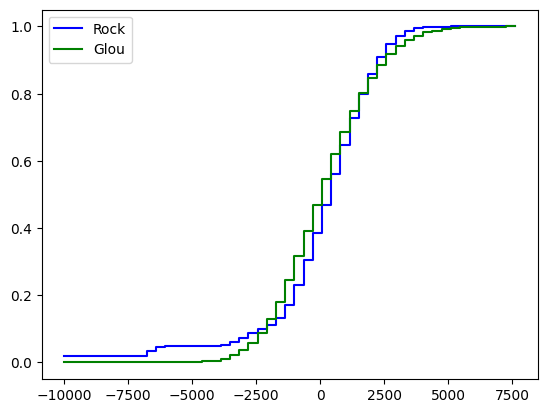

In [ ]:
yF=EmpCDF_F(x)
yG=EmpCDF_G(x)
plt.step(x, yF,label='Rock',color='blue')
plt.step(x, yG,label='Glou',color='green')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print(x[0])
print(EmpCDF_F(x[0]))
print(EmpCDF_G(x[0]))
print(EmpCDF_F(x[0])-EmpCDF_G(x[0]))

-10000.0
0.0193
0.0
0.0193


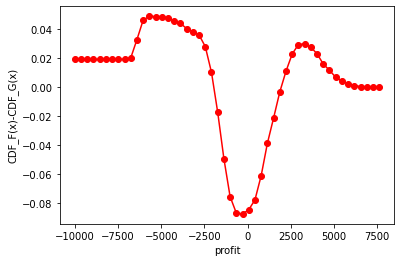

In [ ]:
CDFdiff=np.empty(len(x))
for i in range(0,len(x)):
  CDFdiff[i]=EmpCDF_F(x[i])-EmpCDF_G(x[i])

plt.plot(x, CDFdiff,color='red',marker='o')
plt.xlabel("profit")
plt.ylabel("CDF_F(x)-CDF_G(x)")
plt.show()

## **Central Limit Theorem**

In [ ]:
##https://en.wikipedia.org/wiki/Central_limit_theorem
S=500
lambda_par=0.2
n=3000
xbar=np.empty(S)
for s in range(0,S):
  samples=np.random.poisson(lambda_par,n)
  xbar[s]=np.mean(samples)

mu=sigma2=lambda_par

print(np.mean(xbar))
print(np.std(xbar))
print(sigma2**0.5/n**0.5)

0.19960066666666665
0.007872644593076007
0.00816496580927726


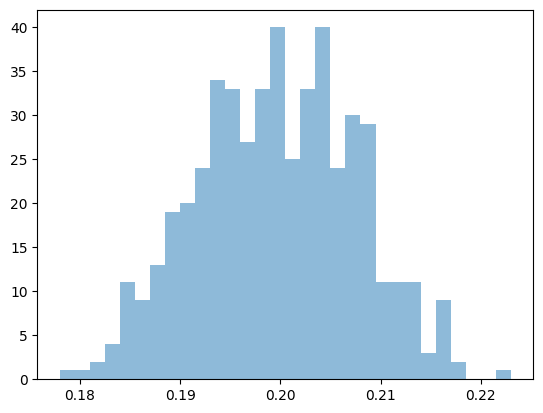

In [ ]:
plt.hist(xbar,bins=30,alpha=0.5)
plt.show()

# **Exponential Distribution**

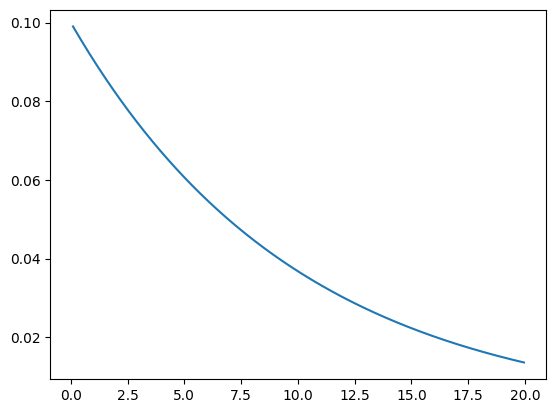

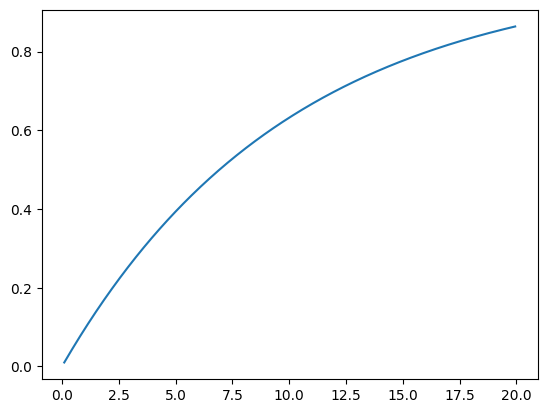

0.6321205588285577

In [ ]:
##https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
t=np.arange(0.1, 20, 0.05)
plt.plot(t,stats.expon.pdf(t,scale=10))
plt.show()

plt.plot(t,stats.expon.cdf(t,scale=10))
plt.show()

stats.expon.cdf(10,scale=10)

In [ ]:
###Modeling exponentially distributed time
S=10000
calls=np.empty(S)
for s in range(0,S):
  k=0
  totaltime=0
  while totaltime<=60:
    totaltime=totaltime+stats.expon.rvs(scale=10,size=1)
    k=k+1
  calls[s]=k-1
  if s%1000 == 0:
    print(s)

stats.describe(calls)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


DescribeResult(nobs=10000, minmax=(0.0, 17.0), mean=5.9831, variance=5.9860129912991304, skewness=0.4235747006522021, kurtosis=0.19521406596761137)

In [ ]:
print(np.unique(calls))
res=stats.relfreq(calls, len(np.unique(calls)))
res.frequency

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]


array([0.003 , 0.0143, 0.0439, 0.0901, 0.1354, 0.1642, 0.1606, 0.1348,
       0.1042, 0.0655, 0.0407, 0.023 , 0.0115, 0.0058, 0.0017, 0.0005,
       0.0005, 0.0003])

In [ ]:
x=np.arange(0,16,1)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
np.round(stats.poisson.pmf(x, 6),3)

array([0.002, 0.015, 0.045, 0.089, 0.134, 0.161, 0.161, 0.138, 0.103,
       0.069, 0.041, 0.023, 0.011, 0.005, 0.002, 0.001])

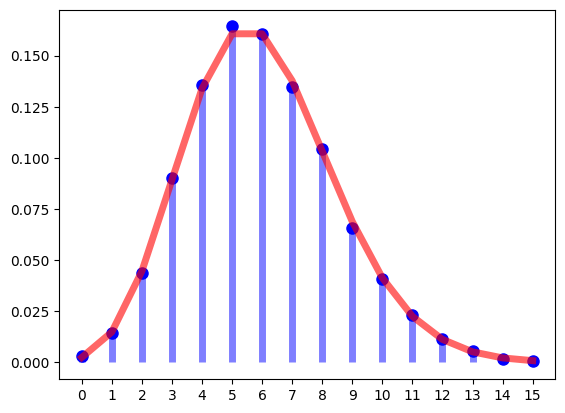

In [ ]:
fig, ax = plt.subplots()
plt.plot(x, res.frequency[x], 'bo', ms=8, label='Relative frequency')
plt.vlines(x, 0, res.frequency[x], colors='b', lw=5, alpha=0.5)
plt.plot(x, stats.poisson.pmf(x, 6),'r-', lw=5, alpha=0.6,label='Poisson pmf')
ax.set_xticks(np.arange(0, max(x)+1, 1))
plt.show()

# Generating the inter-arrival time distribution from Poisson processes

In [ ]:
np.random.seed(9527)
inter_arrtime=[]
trecorder=[0,0]
for t in range(0,6000):
  arrival=np.random.poisson(lam=0.1, size = 1)
  if arrival>0:
    trecorder[1]=t
    intertime=trecorder[1]-trecorder[0]
    inter_arrtime.append(intertime)
    trecorder[0]=t


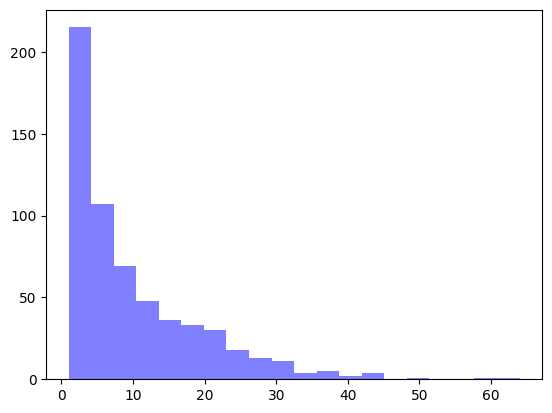

In [ ]:
plt.hist(inter_arrtime,bins=20,alpha=0.5,label='Rock',color='blue')
plt.show()

# **Analysis of Queues**

In [ ]:
def queque_simulate(n_server, S):
    result = pd.DataFrame(columns = ["total_cost", "idle_cost", "loss_cost", "wait_cost", "utilization", "interval"])
    for s in range(S):
        n_idle_server = n_server #初始idle server數量
        n_serving = 0 #初始正在server的數量
        open_hour = 8
        open_minute = open_hour * 60

        record_end_serve_time = []

        n_lost_customer = 0 #初始lost的客人數量
        total_time_server_idle = 0 #初始所有server idle的時間
        total_wait_time = 0 #初始所有客人等待的時間

        #排隊隊伍 cus_ID:客人ID, arr_time:客人抵達時間, quit_time:客人抵達時間+客人願意等待時間
        # queue = pd.DataFrame(columns = ["cust_ID", "arr_time", "quit_time"])
        queue = []
        cust_arr_time = [] #紀錄當天所有客人
        ID_count = 1 #起始客人ID編號
        ###simulate

        for t in range(open_minute): # convert to minute
            #end serve, release server

            if t in record_end_serve_time: #check 這個時間點t有沒有結束服務(end serve time = t)的server
                n_idle_server = n_idle_server + len([record_end_serve_time[record_end_serve_time == t]]) #idle server數量+結束服務的server數量
                n_serving = n_serving - len([record_end_serve_time[record_end_serve_time == t]])#正在服務的客人數量-結束服務的客人數
                record_end_serve_time = [t_ for t_ in record_end_serve_time if t_ != t] #重置server結束時間

            #check lost customer
            idx_loss = []
            if len(queue) > 0:
                for idx_q in range(len(queue)):
                    if queue[idx_q][2] == t:
                        n_lost_customer += 1  #紀錄Loss客人數量
                        idx_loss.append(idx_q) #紀錄Lost客人index
            queue = [queue[i] for i in range(len(queue)) if i not in idx_loss] #從隊伍移除quit客人

        #new customer coming
            if t <= (open_minute - 30): ###關店前30分鐘不收客人
                n_arrived_customer = np.random.poisson(lam = 0.1, size = 1)[0] #6 customer per hour => 0.1 customer per minute
                if n_arrived_customer != 0: #如果有客人抵達
                    for n in range(n_arrived_customer): #record each customer
                        willing_wait_time = np.ceil(np.random.exponential(scale = 1/4, size = 1) * 60)[0] #0.25 per hour
                        queue.append(np.array([ID_count, t, t + willing_wait_time]))  #把每個客人放進排隊隊伍
                        cust_arr_time.append(t) #紀錄抵達時間
                        ID_count = ID_count + 1

            n_arrived_customer = 0 #reset arrived customer

            if n_idle_server != 0:# check 有沒有idle server
                for n in range(n_idle_server): #對每一個idle server
                    if len(queue) == 0: #if 沒人在排隊
                        total_time_server_idle = total_time_server_idle + 1 #總idle時間加1
                    else:
                        #get customer
                        cust_wait_time = t - queue[0][1] #calculate the wait time of the customer
                        total_wait_time = total_wait_time + cust_wait_time

                        queue.pop(0) #remove the customer from queue
                        serve_time = np.round(np.random.exponential(scale = 1/3, size = 1) * 60)[0] #simulate serve time and convert to minute
                        end_serve_time = t + serve_time #calculate the end time
                        record_end_serve_time.append(end_serve_time) #紀錄serve結束時間
                        # cust_list[id-1][3] = end_serve_time
                        n_serving = n_serving + 1 #加上正在Serve的數量
            n_idle_server = n_server - n_serving #計算目前idle server數量

        interval = np.mean(np.diff(cust_arr_time))
        #loss cost:30, idle cost(per hour):10 (per minute):10/60, wait cost(per hour):5 (per minute):5/60
        total_cost = n_lost_customer * 30 + total_time_server_idle * (1/6) + total_wait_time * (1/12)
        utilization = (n_server * 480 - total_time_server_idle) / (n_server * 480)
        result.loc[s] = (total_cost, total_time_server_idle * (1/6), n_lost_customer * 30, total_wait_time * (1/12), utilization,interval)
    return result

In [ ]:
results = pd.DataFrame(columns= ["avg_total_cost", "avg_idle_cost", "avg_loss_cost", "avg_wait_cost", "avg_utilization", "avg_interval"])
for n in range(1, 11): # 1到10台server
  sim_results = queque_simulate(n, 500)
  results.loc[n, :] = sim_results.mean().values #calcalate mean cost of 200 simulation
  print(n)
results

1
2
3
4
5
6
7
8
9
10


,avg_total_cost,avg_idle_cost,avg_loss_cost,avg_wait_cost,avg_utilization,avg_interval
1,925.0785,12.296,903.9,8.8825,0.8463,9.740978
2,629.640167,33.761333,587.28,8.598833,0.788992,10.056946
3,469.939167,63.325667,399.96,6.6535,0.736143,10.022712
4,359.563333,107.317,247.5,4.746333,0.664634,9.96944
5,305.757667,161.315,141.48,2.962667,0.596712,10.03382
6,308.468833,221.897667,84.72,1.851167,0.537713,9.933617
7,331.403667,293.214667,37.26,0.929,0.476402,9.993421
8,386.225833,368.439667,17.28,0.506167,0.424313,9.823864
9,452.961667,440.932333,11.7,0.329333,0.387594,10.052198
10,533.071667,530.419,2.58,0.072667,0.336976,9.939148


Text(0.5, 1.0, 'avg utilization')

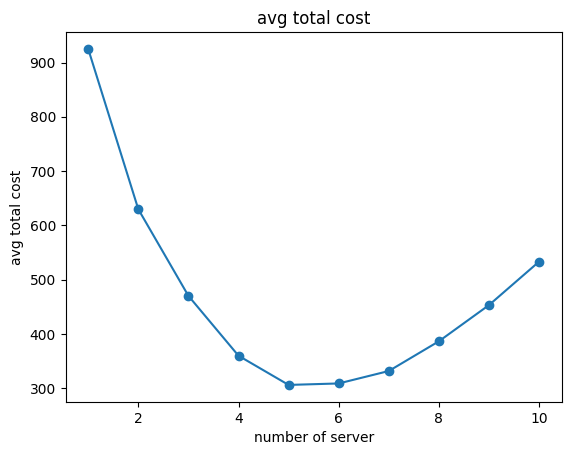

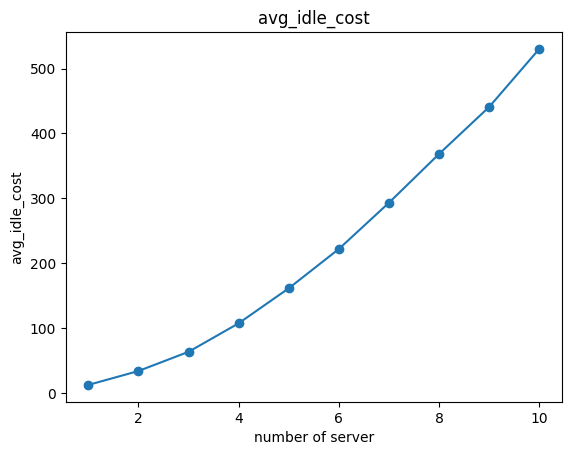

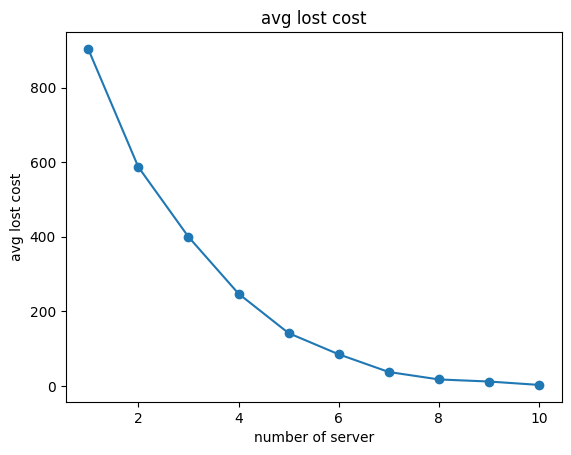

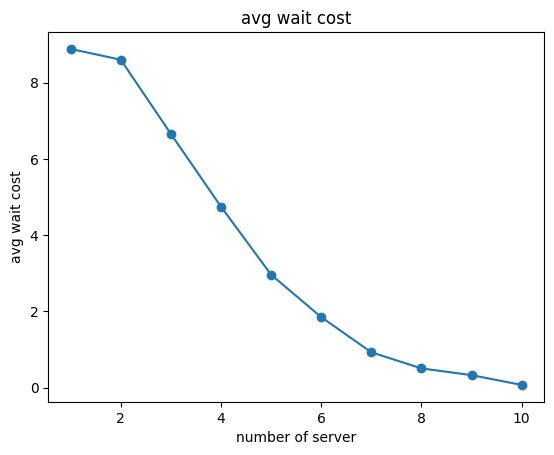

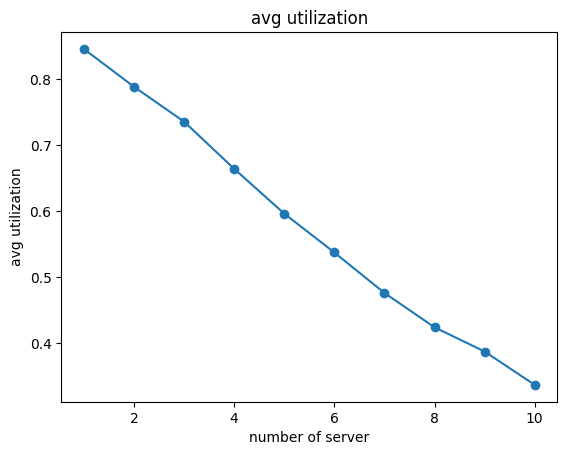

In [ ]:
plt.figure()
plt.plot(results["avg_total_cost"], marker='o')
plt.xlabel("number of server")
plt.ylabel("avg total cost")
plt.title("avg total cost")

plt.figure()
plt.plot(results["avg_idle_cost"], marker='o')
plt.xlabel("number of server")
plt.ylabel("avg_idle_cost")
plt.title("avg_idle_cost")

plt.figure()
plt.plot(results["avg_loss_cost"], marker='o')
plt.xlabel("number of server")
plt.ylabel("avg lost cost")
plt.title("avg lost cost")

plt.figure()
plt.plot(results["avg_wait_cost"], marker='o')
plt.xlabel("number of server")
plt.ylabel("avg wait cost")
plt.title("avg wait cost")

plt.figure()
plt.plot(results["avg_utilization"], marker='o')
plt.xlabel("number of server")
plt.ylabel("avg utilization")
plt.title("avg utilization")

# **Memoryless of Exponential(Lambda)**

In [ ]:
###Verify Memoryless
S=10000
Tsamples=stats.expon.rvs(scale=10,size=S)

print(np.sum(Tsamples>5)/S)
print(np.sum(Tsamples>15)/np.sum(Tsamples>10))

0.6021
0.6108535587673848


# **Gamma Distribution**

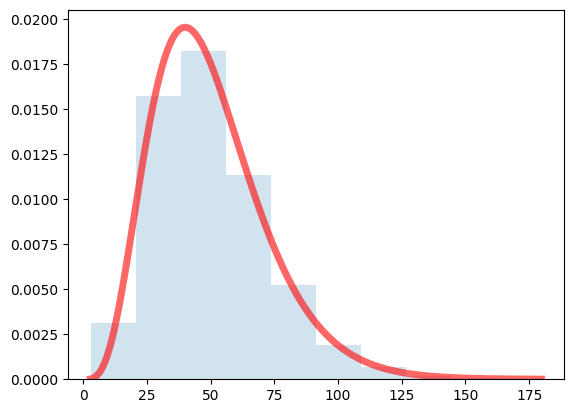

In [ ]:
###Verify gamma distribution
S=10000
timefive=np.empty(S)

for s in range(0,S):
  timefive[s]=np.sum(stats.expon.rvs(size=5,scale=10))

minx=np.round(min(timefive),2)
maxx=np.round(max(timefive),2)

x=np.arange(minx, maxx, 0.01)

fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.gamma.pdf(x,a=5,scale=10),
    'r-', lw=5, alpha=0.6, label='gamma pdf')

ax.hist(timefive, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

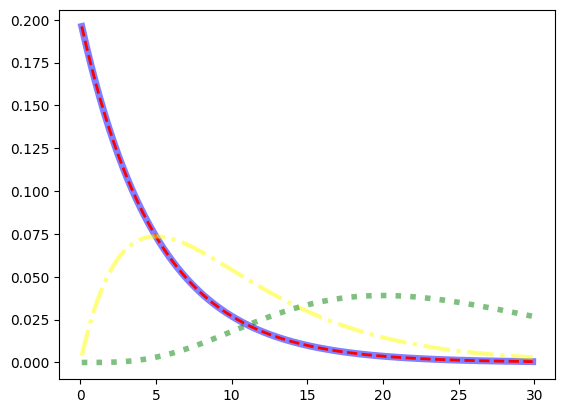

In [ ]:
5##Show the flexibility of gamma distribution
x=np.arange(0.1,30,0.1)
plt.plot(x,stats.expon.pdf(x,scale=5),color='blue', linestyle='-',lw=5, alpha=0.5)
plt.plot(x,stats.gamma.pdf(x,a=1,scale=5),color='red',linestyle='--', lw=2, alpha=1)
plt.plot(x,stats.gamma.pdf(x,a=2,scale=5),color='yellow',linestyle='-.', lw=3, alpha=0.5)
plt.plot(x,stats.gamma.pdf(x,a=5,scale=5),color='green',linestyle=':', lw=4, alpha=0.5)

In [ ]:
stats.gamma.pdf(x,a=1,scale=5)

# **Project Duration Simulation**

In [ ]:
tasktmean=np.array([20,50,60,15,65,35,30,10])
tasktstdev=np.array([7,10,12,3,30,15,5,3])
#Assuming task time as a RV X ~ gamma(a, scale)
#E[X]=a*scale & Var[X]=a*scale^2

scalehat=np.square(tasktstdev)/tasktmean
ahat=tasktmean/scalehat

#Need to check both parameters>0 or not!!!
print(scalehat)
print(ahat)

[ 2.45        2.          2.4         0.6        13.84615385  6.42857143
  0.83333333  0.9       ]
[ 8.16326531 25.         25.         25.          4.69444444  5.44444444
 36.         11.11111111]


In [ ]:
#Define BT:Begin Time & FT: Finish Time
S=10000
penaltyperday=100000
Breduced=0
#Breduced=1 if crashing activity B
simDays=np.empty(S)
simPenalty=np.empty(S)

for i in range(S):
  #i:index for the ith simulation
  taskt_i=np.empty(len(tasktmean))
  for j in range(0,len(tasktmean)):
    #j:activity index
    aj=ahat[j]
    scalej=scalehat[j]
    taskt_ij=stats.gamma.rvs(a=aj,scale=scalej,size=1)
    taskt_i[j]=np.round(taskt_ij,0)
    ##End j loop
  ##Assuming NO reduction in task B time
  BT_A=BT_C=BT_E=0
  ET_A=BT_A+taskt_i[0]
  ET_C=BT_C+taskt_i[2]
  ET_E=BT_E+taskt_i[4]
  #
  BT_B=ET_A
  if Breduced==0:
    ET_B=BT_B+taskt_i[1]
  ##
  if Breduced==1:
    ET_B=BT_B+np.round(taskt_i[1]*0.8,0)
  #
  BT_D=max(ET_B,ET_C)
  ET_D=BT_D+taskt_i[3]
  #
  BT_F=ET_E
  ET_F=BT_F+taskt_i[5]
  #
  BT_G=ET_D
  ET_G=ET_D+taskt_i[6]
  #
  BT_H=ET_G
  ET_H=BT_H+taskt_i[7]
  #
  simDays[i]=max(ET_H, ET_F)
  delayi=max(simDays[i]-130,0)
  simPenalty[i]=delayi*penaltyperday
  if i%1000==0:
    print(i)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [ ]:
#No crashing activitiy B
simDaysbase=simDays
simPenaltybase=simPenalty
#
print(stats.describe(simDaysbase))
print(stats.describe(simPenaltybase))

np.sum(simDaysbase<=130)/S


DescribeResult(nobs=10000, minmax=(91.0, 287.0), mean=133.1475, variance=314.9896427142714, skewness=1.706334859035079, kurtosis=6.737953418749115)
DescribeResult(nobs=10000, minmax=(0.0, 15700000.0), mean=786950.0, variance=1917518449344.9343, skewness=3.3397548252944067, kurtosis=16.631520513250756)


0.4898

In [ ]:
#Crashing activitiy B
simDaysB=simDays
simPenaltyB=simPenalty
#
print(stats.describe(simDaysB))
print(stats.describe(simPenaltyB))

np.sum(simDaysB<=130)/S


In [ ]:
##Stochastic dominance analysis
##See https://www.vosesoftware.com/riskwiki/Stochasticdominancetests.php

baseT=np.round(simDaysbase,0)
reducedT=np.round(simDaysB,0)
EmpCDF_baseT=sm.distributions.ECDF(baseT)
EmpCDF_reducedT=sm.distributions.ECDF(reducedT)

In [ ]:
xT=np.linspace(min([min(baseT),min(reducedT)]), max([max(baseT),max(reducedT)]))
xT

In [ ]:
ybaseT=EmpCDF_baseT(xT)
yreducedT=EmpCDF_reducedT(xT)
plt.step(xT, ybaseT,label='baseDays',color='blue')
plt.step(xT, yreducedT,label='crashBDays',color='green')
plt.legend(loc='upper left')
plt.show()

In [ ]:
baseC=np.round(simPenaltybase,0)
reducedC=np.round(simPenaltyB,0)
EmpCDF_baseC=sm.distributions.ECDF(baseC)
EmpCDF_reducedC=sm.distributions.ECDF(reducedC)

In [ ]:
xC=np.linspace(min([min(baseC),min(reducedC)]), max([max(baseC),max(reducedC)]))
xC

In [ ]:
ybaseC=EmpCDF_baseC(xC)
yreducedC=EmpCDF_reducedC(xC)
plt.step(xC, ybaseT,label='basePenalty',color='blue')
plt.step(xC, yreducedT,label='crashBPenalty',color='green')
plt.legend(loc='upper left')
plt.show()